In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def parse_generic(fname):
    f = open(fname, 'r')
    mu = []
    naive_times = []
    rs_times = []
    hbe_times = []
    naive_time = []
    rs_time = []
    hbe_time = []
    for line in f.readlines():
        if 'mu' in line:
            mu.append(int(line.split(',')[0].split('=')[1]))
            if len(naive_time) > 0:
                naive_times.append(naive_time)
                rs_times.append(rs_time)
                hbe_times.append(hbe_time)
                naive_time = []
                rs_time = []
                hbe_time = []
        if 'Naive average' in line:
            naive_time.append(float(line.split(':')[1]))
        elif 'RS average time' in line:
            rs_time.append(float(line.split(':')[1]))
        elif 'HBE average time' in line:
            hbe_time.append(float(line.split(':')[1]))
    f.close()
    naive_times.append(naive_time)
    rs_times.append(rs_time)
    hbe_times.append(hbe_time)
    return mu, naive_times, rs_times, hbe_times

def plot_samples(x, naive_time, rs_time, hbe_time):
    xx = [1.0/tmp for tmp in x]
    x= xx
    plt.clf()
    f, axes = plt.subplots(1, sharex=True, figsize=(8,4))
    axes.plot(x, [np.average(tmp) for tmp in rs_time], label="Random", 
              marker='s', color='black', linestyle='--', linewidth=1,
              mfc='C0', mec='black', markersize=10)
    axes.plot(x, [np.average(tmp) for tmp in hbe_time], label="LSH", 
              marker='o', color='black', linestyle='--', linewidth=1,
             mfc='C1', mec='black', markersize=12)
    axes.plot(x, [np.average(tmp) for tmp in naive_time], color='grey', linestyle='--', label="Naive")
    axes.set_xscale('log')
    axes.set_yscale('log')
    for i in range(len(x)):
        if i == 0:
            axes.text(x[i], np.average(rs_time[i]) * 0.4, '%.2f' % np.average(rs_time[i]), 
                      horizontalalignment='center', fontsize=12)
            axes.text(x[i], np.average(hbe_time[i]) * 1.4, '%.2f' % np.average(hbe_time[i]), 
                      horizontalalignment='center', fontsize=12)
        else:
            axes.text(x[i], np.average(rs_time[i]) * 1.4, '%.2f' % np.average(rs_time[i]), 
                      horizontalalignment='center', fontsize=12)
            axes.text(x[i], np.average(hbe_time[i]) * 0.4, '%.2f' % np.average(hbe_time[i]), 
                      horizontalalignment='center', fontsize=12)
    plt.xlabel('density', fontsize=15)
    axes.set_ylim(1e-2, 2e2)
    axes.set_ylabel('Query Time (ms)', fontsize=15)
    plt.legend(frameon=False, fontsize=15)
    plt.show()

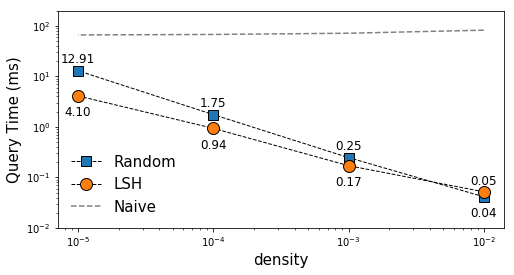

In [4]:
mu, naive_time, rs_time, hbe_time = parse_generic('generic_samples_clean.txt')
#print mu, naive_time, rs_time, hbe_time
plot_samples(mu, naive_time, rs_time, hbe_time)

In [12]:
def parse_real(fname):
    f = open(fname, 'r')
    beta = []
    naive_times = []
    rs_times = []
    rs_errors = []
    hbe_times = []
    hbe_errors = []
    naive_time = []
    rs_time = []
    hbe_time = []
    rs_error = []
    hbe_time = []
    hbe_error = []
    hbe = {"time": {}, "error": {}}
    rs = {"time": {}, "error": {}}
    for line in f.readlines():
        if 'beta' in line:
            if len(beta) > 0:
                if len(naive_time) > 0:
                    naive_times.append(np.average(naive_time))
                    rs_times.append(np.average(rs_time))
                    rs_errors.append(np.average(rs_error))
                    hbe_times.append(np.average(hbe_time))
                    hbe_errors.append(np.average(hbe_error))
                    naive_time = []
                    rs_time = []
                    hbe_time = []
                    rs_error = []
                    hbe_time = []
                    hbe_error = []
                b = beta[-1]
                hbe["time"][b] = hbe_times
                hbe["error"][b] = hbe_errors
                rs["time"][b] = rs_times
                rs["error"][b] = rs_errors
                rs_times = []
                rs_errors = []
                hbe_times = []
                hbe_errors = []
            beta.append(float(line.split(',')[-1].split('=')[1]))
        if "hbe samples" in line:
            if len(naive_time) > 0:
                naive_times.append(np.average(naive_time))
                rs_times.append(np.average(rs_time))
                rs_errors.append(np.average(rs_error))
                hbe_times.append(np.average(hbe_time))
                hbe_errors.append(np.average(hbe_error))
                naive_time = []
                rs_time = []
                hbe_time = []
                rs_error = []
                hbe_time = []
                hbe_error = []
        if 'Naive average' in line:
            naive_time.append(float(line.split(':')[1]))
        elif 'RS average time' in line:
            rs_time.append(float(line.split(':')[1]))
        elif 'RS average error' in line:
            rs_error.append(float(line.split(':')[1]))
        elif 'HBE average time' in line:
            hbe_time.append(float(line.split(':')[1]))
        elif 'HBE average error' in line:
            hbe_error.append(float(line.split(':')[1]))
    f.close()
    if len(naive_time) > 0:
        naive_times.append(np.average(naive_time))
        rs_times.append(np.average(rs_time))
        rs_errors.append(np.average(rs_error))
        hbe_times.append(np.average(hbe_time))
        hbe_errors.append(np.average(hbe_error))
        naive_time = []
        rs_time = []
        hbe_time = []
        rs_error = []
        hbe_time = []
        hbe_error = []
    b = beta[-1]
    hbe["time"][b] = hbe_times
    hbe["error"][b] = hbe_errors
    rs["time"][b] = rs_times
    rs["error"][b] = rs_errors
    return np.average(naive_times), rs, hbe, beta


def plot_scatter(naive_time, rs, hbe, beta):
    plt.clf()
    f, axes = plt.subplots(1, sharex=True, figsize=(8,4))
    b = beta[0]
    axes.scatter(rs["time"][b], rs["error"][b], label="Random")
    for b in beta:
        axes.scatter(hbe["time"][b], hbe["error"][b], label="HBE (beta=%.2f)" % b)
        break
    axes.scatter(naive_time, 0, color='grey', marker='x', s=100, 
                 label='Naive', linewidths=10)
    axes.set_xlabel("Query Time (ms)", fontsize=15)
    axes.set_ylabel("Relative Error", fontsize=15)
    axes.set_yscale('log')
    axes.set_xscale('log')
    plt.legend(fontsize=15, frameon=False)
    plt.show()

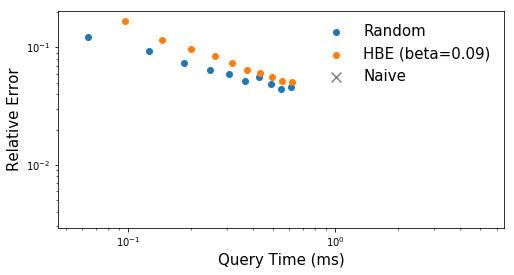

In [15]:
naive_time, rs, hbe, beta = parse_real('shuttle_time_beta_r4.txt')
plot_scatter(naive_time, rs, hbe, beta)

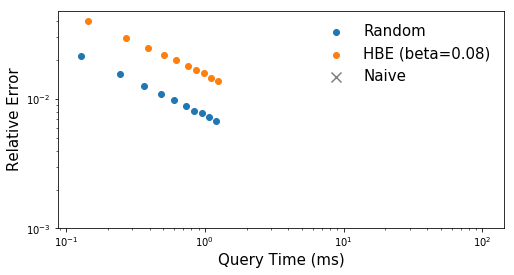

In [14]:
naive_time, rs, hbe, beta = parse_real('susy_time_beta.txt')
plot_scatter(naive_time, rs, hbe, beta)